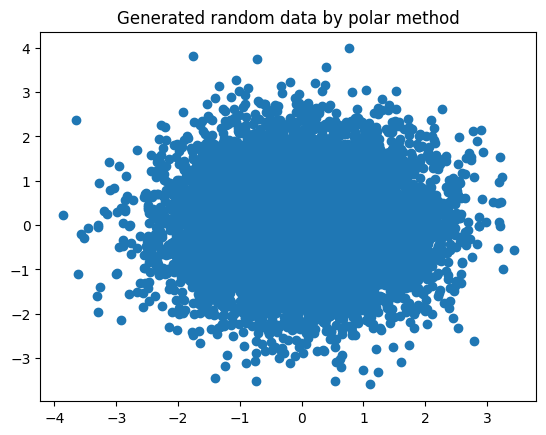

In [32]:
#  Setup dla zadanie A

import matplotlib.pyplot as plt
import numpy as np
import math

mu = 0
sigma = 1
N = 10000

def random_numbers():
    x = np.zeros(N)
    y = np.zeros(N)
    z = np.zeros(N)

    i = 0

    while i < N:
        u1 = np.random.rand()
        u2 = np.random.rand()
        v1 = 2 * u1 - 1
        v2 = 2 * u2 - 1
        s = v1**2 + v2**2

        if s <= 1:
            x[i] = ((-2 * np.log(s) / s)**0.5) * v1
            y[i] = ((-2 * np.log(s) / s)**0.5) * v2
            z[i] = (x[i] + y[i]) / np.sqrt(2)
            i += 1
        else:
            i -= 1
    
    plt.title("Generated random data")        
    plt.scatter(x,y)
    plt.show()
    return z


def f(mean, std, val):
    a = 1/(np.sqrt(2*np.pi)*std)
    diff = np.abs(np.power(val-mean, 2))
    b = np.exp(-(diff)/(2*std*std))
    return a*b

data_ = random_numbers()

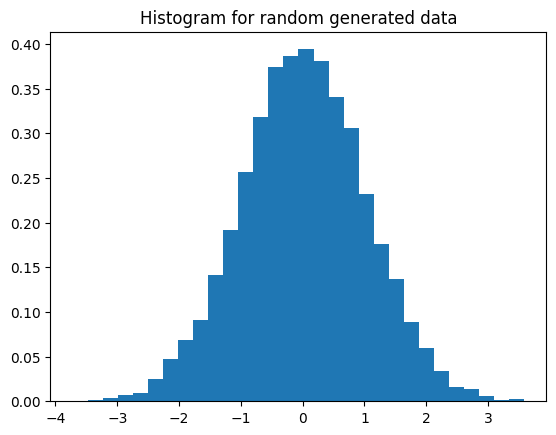

In [33]:
#  Zadanie A generowanie histogram z danych
plt.title("Histogram for random generated data")
plt.hist(data_, 30, density=True)
plt.show()

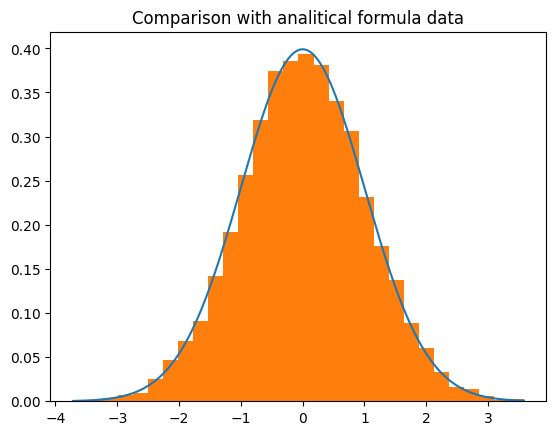

In [34]:
#  Zadanie A porównanie
p, x = np.histogram(data_, len(data_))
x = x[:-1] + (x[1] - x[0])
f_data = [f(mu,sigma,i) for i in x]

plt.title("Comparison with analitical formula data")
plt.plot(x, f_data)
plt.hist(data_, 30, density=True)
plt.show()

In [16]:
#  Zadania B setup

a = 50
Z = 100

def p_a(a, p, z):
    q = 1 - p
    up = ((q/p)**a) - ((q/p)**z)
    down = 1 - ((q/p)**z)
    return up/down

def game(a, p, Z):
    b = Z - a
    
    n_game = 0
    while b != 0 and a != 0:
        res = np.random.random_sample()
        if res <= p:
            a += 1
            b -= 1
        if res > p:
            b += 1
            a -= 1

        n_game += 1
    
    return [1, n_game] if b == 0 else [2, n_game]

In [17]:
#  Zadanie B simulacje

p_range = [float(f"{i/100}"[:4]) for i in range(1,100, 2) if i != 50]
results_b = dict()

for i in p_range:
    for j in range(1000):
        res = game(a, i, Z)
        key = f"{i}"
        if results_b.get(key, None):
            results_b[key].append(res)
        else:
            results_b[key] = [res, ]
    
    
        

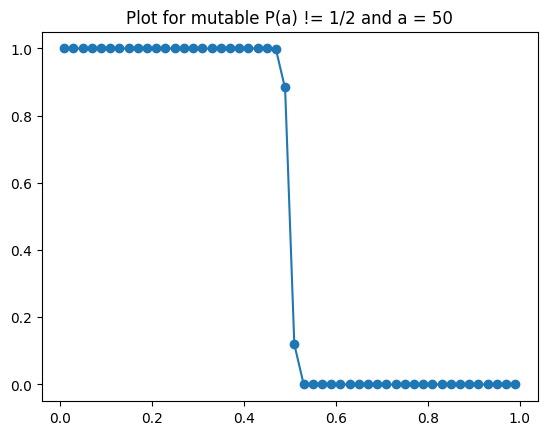

In [18]:
#  Zadanie B plots

prd_a = []
results = []
p_range = [ 
        float(k) 
        for k in results_b.keys() 
        # if float(k) >= 0.30 or float(k) <= 0.70
    ]

for p in p_range:
    
    results_p_sims = results_b.get(f"{p}", [])
    prd_a.append(p_a(a, p, Z))
    
    b_wins = 0
    for x in results_b.get(f"{p}", []):
        if x[0] == 2:
            b_wins += 1
            
    results.append(b_wins/len(results_p_sims))
            
plt.title('Plot for mutable P(a) != 1/2 and a = 50')
plt.plot(p_range, prd_a) # Analitic
plt.scatter(p_range, results) # from sims
plt.show()

In [19]:
#  Zadanie C setup

p = q = 0.5
Z = 100
def p_r(a, Z):
    return 1 - (a/Z)


In [20]:
#  Zadanie C symulacje

a_range = range(1, 100, 5)
results_c = dict()

for i in a_range:
    for j in range(1000):
        res = game(i, p, Z)
        key = i
        if results_c.get(key, None):
            results_c[key].append(res)
        else:
            results_c[key] = [res, ]

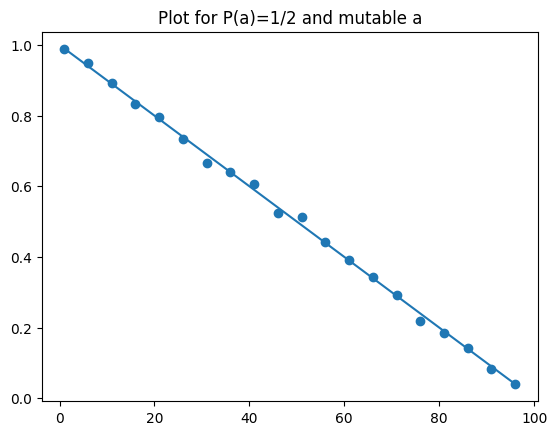

In [21]:
#  Zadanie C plots

prd_a = []
results = []

for a in a_range:
    
    results_sims = results_c.get(a, [])
    prd_a.append(p_r(a, Z))
    
    b_wins = 0
    for x in results_sims:
        if x[0] == 2:
            b_wins += 1
            
    results.append((b_wins/len(results_sims)))
            
plt.title("Plot for P(a)=1/2 and mutable a")
plt.plot(a_range, prd_a) # Analitic
plt.scatter(a_range, results) # From experiment
plt.show()

In [22]:
#  Zadanie D setup

a = b = 50
range_p = [0.20, 0.50, 0.80]
Z = a+b


In [23]:
#  Zadanie D symulacje

results_d = dict()

for i in range_p:
    for j in range(10000):
        res = game(a, i, Z)
        key = str(i)
        if results_d.get(key, None):
            results_d[key].append(res)
        else:
            results_d[key] = [res, ]

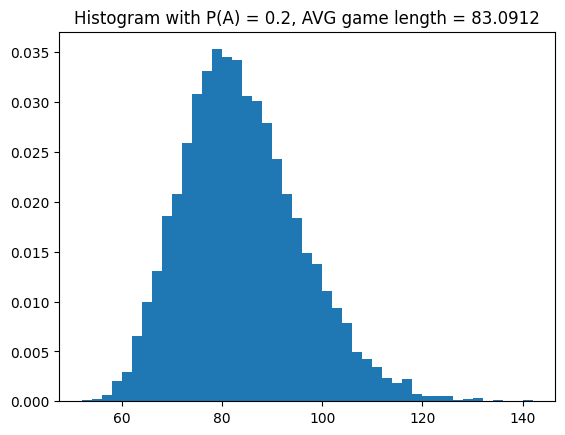

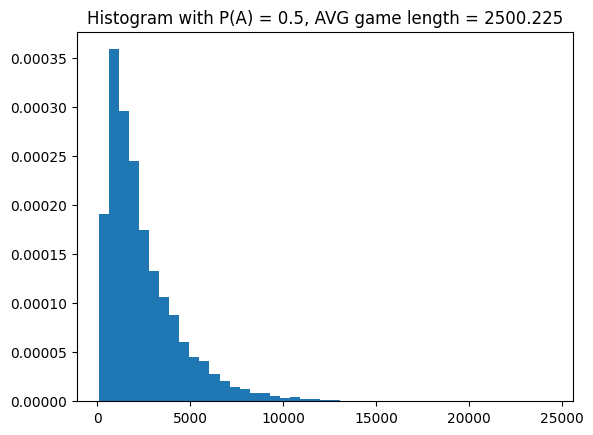

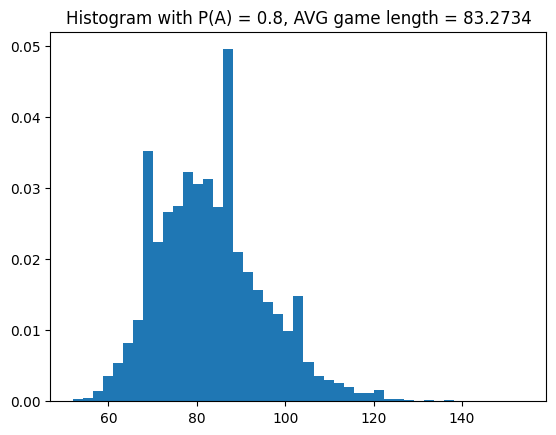

In [24]:
#  Zadanie D plots

for i in range_p:
    results_l = [x[1] for x in results_d.get(str(i), [])]
    avg = np.average(results_l)
    plt.title(f"Histogram with P(A) = {i}, AVG game length = {avg}")
    plt.hist(results_l, 45, density=True)
    plt.show()

In [25]:
#  Zadanie G setup

a = 50
p = 0.50
Z = 100


In [26]:
#  Zadanie G simulation

results_g = []

for i in range(50):
    
    results_g.append(game(a,p,Z))

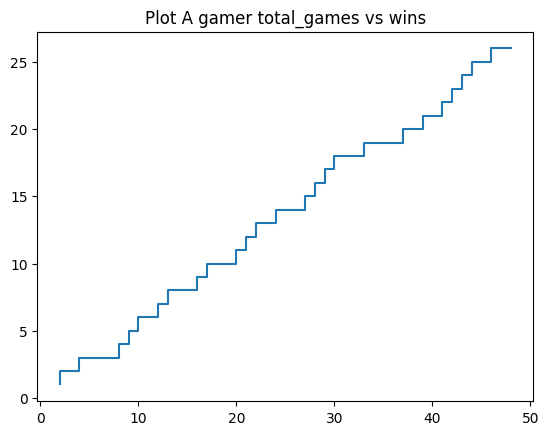

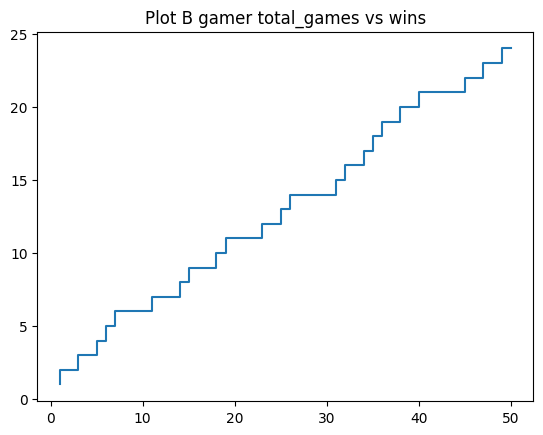

In [27]:
#  Zadanie G plots A and B for P(a) = P(b) = 0.5

a_games = []
b_games = []
a_wins = []
b_wins = []
n_games = 0
a_ = 0
b_ = 0

for i in results_g:
    n_games += 1
    
    if i[0] == 1:
        a_ += 1
        a_wins.append(a_)
        a_games.append(n_games)
    if i[0] == 2:
        b_ += 1
        b_wins.append(b_)
        b_games.append(n_games)
    
plt.title("Plot A gamer total_games vs wins")
plt.step(a_games, a_wins)
plt.show()

plt.title("Plot B gamer total_games vs wins")
plt.step(b_games, b_wins)
plt.show()
    